In [95]:
import gensim
from collections import defaultdict

### 用wiki+新闻，训练个新的词向量

In [271]:
import pickle
train_data = []
for filename in os.listdir('/Users/sinong/data/train_data/'):
    if filename == '.DS_Store': continue
    with open('/Users/sinong/data/train_data/' + str(filename), 'rb') as f:
        train_data.extend(pickle.load(f)) 
with open('./news.txt', 'r') as f:
    for line in f:
        words = jieba.cut(''.join(re.findall(r'\w+',line)))
        train_data.extend([word for word in words])

In [277]:
with open('/Users/sinong/data/wiki-news-sentences-cut.txt', 'w') as f:
    for line in train_data:
        f.write(' '.join(line) + '\n')

In [283]:
model = Word2Vec(min_count = 1)
model.build_vocab(train_data)  # prepare the model vocabulary
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

/Users/sinong/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(193519998, 212728905)

In [308]:
model.save('wiki-news')

/Users/sinong/anaconda3/envs/nlp/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [289]:
len(model.wv.vocab)

708264

### 加载coreNLP

In [78]:
'''
A sample code usage of the python package stanfordcorenlp to access a Stanford CoreNLP server.
Written as part of the blog post: https://www.khalidalnajjar.com/how-to-setup-and-use-stanford-corenlp-server-with-python/ 
'''
from stanfordcorenlp import StanfordCoreNLP
import logging
import json
class StanfordNLP:
    def __init__(self, host='http://localhost', port=9000):
        self.nlp = StanfordCoreNLP(host, port=port,
        timeout=30000)  # , quiet=False, logging_level=logging.DEBUG)
        self.props = {
        'annotators': 'tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref,relation',
        'pipelineLanguage': 'en',
        'outputFormat': 'json'
            }
    def word_tokenize(self, sentence):
        return self.nlp.word_tokenize(sentence)
    def pos(self, sentence):
        return self.nlp.pos_tag(sentence)
    def ner(self, sentence):
        return self.nlp.ner(sentence)
    def parse(self, sentence):
        return self.nlp.parse(sentence)
    def dependency_parse(self, sentence):
        return self.nlp.dependency_parse(sentence)
    def annotate(self, sentence):
        return json.loads(self.nlp.annotate(sentence, properties=self.props))
    @staticmethod
    def tokens_to_dict(_tokens):
        tokens = defaultdict(dict)
        for token in _tokens:
            tokens[int(token['index'])] = {
                'word': token['word'],
                'lemma': token['lemma'],
                'pos': token['pos'],
                'ner': token['ner']
            }
            return tokens

### 表达'说'的词语

In [242]:
from tqdm import tqdm_notebook

In [294]:
start = ['认为', '表示', '说', '建议']
to_visit = start
seen = set()
graph = defaultdict(list)
node_score = defaultdict(float)
for i in tqdm_notebook(range(5000)):
    if to_visit == []: break
    frontier = to_visit.pop()
    node_score[frontier] += 1
    if frontier in seen: 
        continue
    successors = model.wv.most_similar(frontier, topn = 20)
    for word, score in successors:
        if re.findall(r'[\u4e00-\u9fa5]', word) and sNLP.ner(word)[0][1] is not 'PERSON':
            to_visit = [word] + to_visit
            graph[frontier].append(word)
        
    seen.add(frontier)

In [299]:
node_score['说']

5.0

In [295]:
sorted(node_score.items(), key = lambda x: x[1], reverse = True)

[('议案', 32.0),
 ('提案', 29.0),
 ('裁决', 28.0),
 ('承诺', 26.0),
 ('否认', 24.0),
 ('谴责', 24.0),
 ('诉讼', 22.0),
 ('呼吁', 21.0),
 ('让步', 20.0),
 ('立法', 20.0),
 ('监管', 18.0),
 ('控诉', 18.0),
 ('资方', 18.0),
 ('指责', 18.0),
 ('道歉', 17.0),
 ('决议', 17.0),
 ('游说', 16.0),
 ('要求', 15.0),
 ('声明', 15.0),
 ('重申', 15.0),
 ('中国政府', 15.0),
 ('草案', 15.0),
 ('意见', 14.0),
 ('回应', 14.0),
 ('干预', 14.0),
 ('设法', 14.0),
 ('出面', 14.0),
 ('协商', 14.0),
 ('违宪', 14.0),
 ('原告', 14.0),
 ('请求', 13.0),
 ('说道', 13.0),
 ('猜测', 13.0),
 ('澄清', 13.0),
 ('质疑', 13.0),
 ('采取行动', 13.0),
 ('言论', 13.0),
 ('表决', 13.0),
 ('商讨', 13.0),
 ('驳斥', 13.0),
 ('同意', 12.0),
 ('回答', 12.0),
 ('尽快', 12.0),
 ('判决', 12.0),
 ('纠正', 12.0),
 ('说出', 11.0),
 ('声称', 11.0),
 ('批评', 11.0),
 ('交涉', 11.0),
 ('妥协', 11.0),
 ('谈判', 11.0),
 ('磋商', 11.0),
 ('抨击', 11.0),
 ('条款', 11.0),
 ('此案', 11.0),
 ('指控', 11.0),
 ('反驳', 11.0),
 ('商议', 11.0),
 ('进行谈判', 11.0),
 ('施压', 10.0),
 ('反对', 10.0),
 ('发言', 10.0),
 ('通知', 10.0),
 ('立即', 10.0),
 ('表态', 10.0),
 ('美国政府', 10.0),
 (

In [302]:
synonyms = [k for k in node_score.keys() if node_score[k] > 3]
print(len(synonyms))

388


/Users/sinong/anaconda3/envs/nlp/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


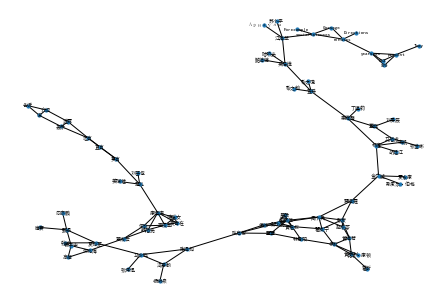

In [151]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
word_graph = nx.Graph(dict([[k, graph[k]] for k in list(graph.keys())[:50]]))
nx.draw(word_graph, with_labels=True, node_size=10, font_size=5)
plt.savefig("graph.png", dpi=1000)

In [304]:
graph

defaultdict(list,
            {'建议': ['提议',
              '要求',
              '意见',
              '请求',
              '同意',
              '施压',
              '指示',
              '承诺',
              '让步',
              '呼吁',
              '提案',
              '为此',
              '禁令',
              '协助',
              '监管',
              '建言',
              '反对',
              '行政部门',
              '证词',
              '倡议'],
             '说': ['说道',
              '所说',
              '回答',
              '吗',
              '谈论',
              '写道',
              '为什么',
              '深信',
              '告诉',
              '说出',
              '名言',
              '讲',
              '猜测',
              '相信',
              '声称',
              '明白',
              '解释',
              '时说',
              '知道',
              '大声'],
             '表示': ['回应',
              '表达',
              '澄清',
              '指出',
              '透露',
              '声称',
              '声明',
              '说明',
  

In [307]:
word_network = nx.graph.Graph(graph)
sorted(nx.pagerank(word_network).items(),key=lambda x: x[1], reverse=True)

[('驯化', 0.0009398329368714071),
 ('领衔', 0.000901712982323236),
 ('穆里尼奥', 0.0008403666126735934),
 ('唱', 0.0008333248999016389),
 ('参访', 0.0008187332381269511),
 ('信任投票', 0.0008167017744622192),
 ('队长', 0.0008112538168242929),
 ('头盖骨', 0.0008079596116609448),
 ('疑有', 0.0007913269469512997),
 ('怨气', 0.0007892672194556078),
 ('推估', 0.0007838801954964),
 ('程序段', 0.0007768233046956333),
 ('示好', 0.0007708935025739245),
 ('伟人', 0.0007582875511768367),
 ('研判', 0.0007577447131207699),
 ('经济制裁', 0.000749955309464795),
 ('谬论', 0.0007499393915651341),
 ('保险业', 0.0007341062543041511),
 ('私利', 0.0007259249905527794),
 ('哪怕', 0.0007137175553699302),
 ('后大', 0.0007125381827495987),
 ('轻率', 0.0006956275631720151),
 ('执教', 0.0006918407908712513),
 ('已知', 0.00069125211615764),
 ('噢', 0.0006904635914057418),
 ('根本就是', 0.0006882124563385695),
 ('爱过', 0.0006823904199517296),
 ('妥善处理', 0.0006762987306188179),
 ('狐仙', 0.0006641212585778761),
 ('联姻', 0.000662960110221489),
 ('施加压力', 0.000661049405707985),
 ('积

### 定位表达“说”的关键词，并且用dependency parsing找到nominal subject

In [330]:
import random

In [343]:
news = []
with open('./news.txt', 'r') as f:
    for line in f:
        news.append(line)

In [377]:
def keyword_search(document, keywords, method='match'):
    if method == 'regex':
        ptn = r'({})'.format('|'.join(keywords))
        return re.compile(ptn).sub(repl="**\g<1>**", string = document)
    elif method == 'match':
        found = defaultdict(list)
        for i, word in enumerate(document.split()):
            if word in keywords:
                found[word].append(i)
        return found

In [369]:
text = '李克强说，党的十八大以来，以习近平同志为核心的党中央把转变政府职能作为深化经济体制改革和行政体制改革的关键，多次作出部署。本届政府紧紧围绕处理好政府与市场关系，按照使市场在资源配置中起决定性作用和更好发挥政府作用的要求，始终抓住“放管服”改革这一牛鼻子，坚韧不拔地推进政府职能转变。这是一场深刻的刀刃向内的自我革命，通过改革以审批发证为主要内容的传统管理体制、革除与审批发证相关联的寻租权力和不当利益、改变与审批发证相伴的“看家本领”，推动政府加快适应社会主义市场经济发展要求，最大限度减少审批，多措并举加强监管，不断创新优化服务，打造便利、公平的市场环境，更大激发市场活力和社会创造力，推动政府治理体系现代化。\n'

In [382]:
cut_text = ' '.join(jieba.cut(text))
cut_text

'李克强 说 ， 党 的 十八 大 以来 ， 以 习近平 同志 为 核心 的 党中央 把 转变 政府职能 作为 深化 经济体制 改革 和 行政 体制改革 的 关键 ， 多次 作出 部署 。 本届 政府 紧紧围绕 处理 好 政府 与 市场 关系 ， 按照 使 市场 在 资源配置 中起 决定性 作用 和 更好 发挥 政府 作用 的 要求 ， 始终 抓住 “ 放管服 ” 改革 这一 牛鼻子 ， 坚韧不拔 地 推进 政府职能 转变 。 这是 一场 深刻 的 刀刃 向 内 的 自我 革命 ， 通过 改革 以 审批 发证 为 主要 内容 的 传统 管理体制 、 革除 与 审批 发证 相关联 的 寻租 权力 和 不当 利益 、 改变 与 审批 发证 相伴 的 “ 看家本领 ” ， 推动 政府 加快 适应 社会主义 市场经济 发展 要求 ， 最大 限度 减少 审批 ， 多措 并举 加强 监管 ， 不断创新 优化 服务 ， 打造 便利 、 公平 的 市场 环境 ， 更大 激发 市场 活力 和 社会 创造力 ， 推动 政府 治理 体系 现代化 。 \n'

In [383]:
keyword_search(cut_text, ['说', '认为'])

defaultdict(list, {'说': [1]})

In [387]:
print([[cut_text.split()[x[1]-1], cut_text.split()[x[2]-1]]  for x in sNLP.dependency_parse(' '.join(jieba.cut(text))) if x[0] == 'nsubj'])

[['说', '李克强'], ['党', '说'], ['好', '本届'], ['党中央', '的'], ['的', '体制改革'], ['政府', '好'], ['资源配置', '在'], ['的', '作用'], ['的', '这是']]


In [407]:
# 需要提升：找到subject的修饰词，使得opinion holder更加完整
for i, text in enumerate(news):
    cut_text = ' '.join(jieba.cut(text))
    found = keyword_search(cut_text, ['说'])
    if found:
        dependencies = sNLP.dependency_parse(cut_text) 
        pos = sNLP.pos(cut_text)
        for keyword in found.keys():
            for idx in found[keyword]:
                for dependency in dependencies:
                    if dependency[0] in ['nsubj', 'csubj'] and dependency[1]-1 == idx:
                        text_split = cut_text.split()
                        idx_governor = dependency[1]-1
                        idx_sub = dependency[2]-1
                        if pos[idx_sub][1] in ['NN', 'NR']:
                            print(i)
                            print(''.join(text_split[:idx_sub + 5]))
                            print([text_split[idx_governor], text_split[idx_sub]])

172
新华社华盛顿６月６日电（记者陆佳飞周而捷）美军中央司令部６日说，
['说', '司令部']
239
新华社内罗毕６月６日电肯尼亚官员６日说，
['说', '官员']
282
新华社巴黎６月６日电（记者韩冰应强）法国内政部长热拉尔·科隆６日说，
['说', '科隆']
284
新华社内罗毕６月６日电（记者金正王小鹏）肯尼亚官员６日说，
['说', '官员']
561
新华社吉隆坡６月６日电（记者林昊、刘彤）亚足联６日说，
['说', '亚足联']
593
卡塔尔断交风波谁来挑斡旋大梁？\n陈立希\n卡塔尔外交大臣穆罕默德·本·阿卜杜勒拉赫曼·阿勒萨尼说，卡塔尔埃米尔
['说', '阿勒萨尼']
593
卡塔尔断交风波谁来挑斡旋大梁？\n陈立希\n卡塔尔外交大臣穆罕默德·本·阿卜杜勒拉赫曼·阿勒萨尼说
['说', '阿卜杜勒']
780
新华社青岛６月６日电（记者张旭东）国家新闻出版广电总局副局长童刚６日在青岛
['说', '童刚']
780
新华社青岛６月６日电（记者张旭东）国家新闻出版广电总局副局长童刚６日在青岛说，经过长期
['说', '青岛']
1001
新华社北京6月6日电（记者侯雪静）中国农业发展银行副行长鲍建安6日说，
['说', '建安']
1108
新华社华盛顿６月５日电（记者徐剑梅刘阳）美国白宫发言人莎拉·桑德斯５日说，
['说', '桑德斯']
1108
新华社华盛顿６月５日电（记者徐剑梅刘阳）美国白宫发言人莎拉·桑德斯５日说，
['说', '桑德斯']
1271
新华社堪培拉６月６日电（记者赵博）澳大利亚国立大学研究人员领衔的一个国际团队近日说，他们
['说', '团队']
1271
新华社堪培拉６月６日电（记者赵博）澳大利亚国立大学研究人员领衔的一个国际团队近日说，
['说', '国际']
1429
新华社华盛顿６月５日电美国东南部佛罗里达州奥兰多一家公司内５日发生枪击案，警方说，包括枪手
['说', '警方']
1499
*（图表·漫画）[关注高考]虚构\n\n*（图表）[财经]世行维持今年全球经济增长预期2.7%不变\n\n*（图表·漫画）[全国爱眼日]远离近视\n\n*（图表）[印度交通事故]印度北方邦车祸致22人死亡\n\n*（图表）[财经·汇率]人民币对美元汇率中间价上涨135个基点\n\n*（图表·漫画）[关注高考]家有考生

KeyboardInterrupt: 

### 找到完整的opinion内容

将整句话作为一个document，用tfidf向量化，用于判断前后两句话的主要内容是否一致

In [309]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [312]:
#将train_data
vectorized = TfidfVectorizer(max_features=10000)
X = vectorized.fit_transform([' '.join(words) for words in train_data])

In [313]:
X.shape

(14221459, 10000)

In [322]:
transposed_x = X.T
word_2_id = vectorized.vocabulary_
id_2_word = {d: w for w, d in word_2_id.items()}

In [327]:
set(vectorized.vocabulary_.keys()) and set(synonyms)

{'不得不',
 '严惩',
 '中共中央',
 '中华人民共和国政府',
 '中国政府',
 '中央党部',
 '中央政府',
 '中方',
 '为什么',
 '为何',
 '主动',
 '举报',
 '义务',
 '书面',
 '事实',
 '交涉',
 '人事',
 '人权',
 '介入',
 '企图',
 '会谈',
 '作证',
 '你们',
 '使用暴力',
 '依法',
 '侵权',
 '侵犯',
 '促请',
 '保密',
 '保证',
 '保障',
 '修宪',
 '修正案',
 '修法',
 '借机',
 '倡议',
 '停战',
 '催促',
 '免除',
 '兑现',
 '党中央',
 '入境',
 '全力',
 '公安机关',
 '公投',
 '公民投票',
 '公然',
 '共产国际',
 '共识',
 '写信',
 '军报',
 '军方',
 '决心',
 '决意',
 '决策',
 '决议',
 '出面',
 '刘少奇',
 '判决',
 '利益',
 '到底',
 '制止',
 '制裁',
 '劝告',
 '劝说',
 '动议',
 '劳工',
 '医疗卫生',
 '协商',
 '卫生',
 '原告',
 '反对',
 '反战',
 '反驳',
 '发文',
 '发言',
 '发誓',
 '号召',
 '司法',
 '各方',
 '各界',
 '同意',
 '名言',
 '吗',
 '否定',
 '否认',
 '听取',
 '听证会',
 '告诉',
 '告诫',
 '呢',
 '周恩来',
 '呼吁',
 '命令',
 '和解',
 '和谈',
 '咨询',
 '响应',
 '商讨',
 '商议',
 '商谈',
 '啊',
 '回应',
 '回报',
 '回答',
 '国会',
 '国民政府',
 '图谋',
 '坚决',
 '坚称',
 '基本法',
 '声援',
 '声明',
 '声称',
 '处分',
 '大声',
 '契约',
 '好好',
 '妥协',
 '安全',
 '安慰',
 '审批',
 '审查',
 '审核',
 '审议',
 '宣判',
 '宣扬',
 '宣称',
 '宣读',
 '宪法',
 '容忍',
 '对待',
 '寻求',
 '尊重',
 '尽力',
 '尽快',
 '尽早',
 '尽速',
 '

In [323]:
from scipy.spatial.distance import cosine
def distance(v1, v2): return cosine(v1, v2)

In [324]:
def search_synonyms(synonyms):
    """
    @synonyms are the words to search, splited by space
    @document is a whole news document to be searched from
    @return is the related documents which ranked by tfidf similarity
    """
    words = synonyms.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]

    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    merged_documents = reduce(or_, documents_ids)
    # we could know the documents which contain these words
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id

In [325]:
search_synonyms(' '.join(synonyms))
1. 找word2id的替代方案，maybe defaultdict
2. 扩展func，每次输入一个新闻，计算tfidf，以此作为检索范围

KeyError: '说'

### 抽取关键信息

In [119]:
sNLP = StanfordNLP()
#print ("Annotate:", sNLP.annotate(text))
#print ("POS:", sNLP.pos(text))
#print ("Tokens:", sNLP.word_tokenize(text))
#print ("NER:", sNLP.ner(text))
#print ("Parse:", sNLP.parse(text))
#print ("Dep Parse:", sNLP.dependency_parse(text))


In [159]:
import jieba
import re
from tqdm import tqdm

person_entities = set()
verbs = set()
for i in tqdm(range(int(len(news)/100))):
    sentence = ' '.join([word for word in jieba.cut(''.join(re.findall(r'\w', news[i])))])
    entities = sNLP.ner(sentence)
    for entity in entities:
        if entity[1] == 'PERSON':
            person_entities.add(entity)
    pos = sNLP.pos(sentence)
    for word in pos:
        if word[1] == 'VV':
            verbs.add(word)




  0%|          | 0/1478 [00:00<?, ?it/s]


  0%|          | 1/1478 [00:00<02:43,  9.01it/s]


  0%|          | 3/1478 [00:00<02:18, 10.68it/s]


  0%|          | 7/1478 [00:00<01:48, 13.61it/s]


  1%|          | 13/1478 [00:00<01:23, 17.56it/s]


  1%|▏         | 19/1478 [00:00<01:11, 20.36it/s]


  2%|▏         | 24/1478 [00:00<00:59, 24.56it/s]


  2%|▏         | 30/1478 [00:00<00:49, 29.17it/s]


  2%|▏         | 34/1478 [00:01<00:53, 26.84it/s]


  3%|▎         | 40/1478 [00:01<00:45, 31.64it/s]


  3%|▎         | 45/1478 [00:01<00:43, 32.95it/s]


  3%|▎         | 49/1478 [00:01<00:46, 31.00it/s]


  4%|▍         | 56/1478 [00:01<00:38, 36.56it/s]


  4%|▍         | 62/1478 [00:01<00:34, 41.22it/s]


  5%|▍         | 68/1478 [00:01<00:31, 44.61it/s]


  5%|▌         | 74/1478 [00:01<00:32, 42.77it/s]


  5%|▌         | 79/1478 [00:01<00:32, 43.50it/s]


  6%|▌         | 84/1478 [00:02<00:38, 35.79it/s]

 37%|███▋      | 546/1478 [00:35<00:35, 25.96it/s]


  6%|▌         | 89/1

 39%|███▊      | 571/1478 [00:21<00:51, 17.63it/s]


 39%|███▉      | 575/1478 [00:21<00:43, 20.92it/s]


 39%|███▉      | 580/1478 [00:21<00:35, 25.03it/s]


 40%|███▉      | 587/1478 [00:21<00:29, 30.37it/s]


 40%|████      | 593/1478 [00:21<00:28, 31.47it/s]


 40%|████      | 597/1478 [00:21<00:32, 27.38it/s]


 41%|████      | 601/1478 [00:21<00:30, 29.13it/s]


 41%|████      | 607/1478 [00:22<00:25, 34.30it/s]


 41%|████▏     | 612/1478 [00:22<00:37, 23.18it/s]


 42%|████▏     | 616/1478 [00:22<00:42, 20.38it/s]


 42%|████▏     | 619/1478 [00:22<00:48, 17.54it/s]


 42%|████▏     | 624/1478 [00:22<00:39, 21.71it/s]


 43%|████▎     | 631/1478 [00:23<00:31, 27.12it/s]


 43%|████▎     | 636/1478 [00:23<00:29, 28.38it/s]


 43%|████▎     | 640/1478 [00:23<00:28, 29.24it/s]


 44%|████▎     | 644/1478 [00:23<00:28, 29.45it/s]


 44%|████▍     | 649/1478 [00:23<00:25, 32.01it/s]


 44%|████▍     | 653/1478 [00:23<00:26, 31.01it/s]


 44%|████▍     | 657/1478 [00:23<00:24, 33.22i

 76%|███████▌  | 1117/1478 [00:42<00:20, 17.27it/s]


 76%|███████▌  | 1120/1478 [00:42<00:19, 18.60it/s]


 76%|███████▌  | 1123/1478 [00:43<00:20, 17.63it/s]


 76%|███████▌  | 1126/1478 [00:43<00:20, 17.12it/s]


 76%|███████▋  | 1130/1478 [00:43<00:17, 20.09it/s]


 77%|███████▋  | 1136/1478 [00:43<00:13, 24.58it/s]


 77%|███████▋  | 1140/1478 [00:43<00:13, 25.26it/s]


 77%|███████▋  | 1144/1478 [00:43<00:12, 25.78it/s]


 78%|███████▊  | 1147/1478 [00:44<00:15, 21.29it/s]


 78%|███████▊  | 1153/1478 [00:44<00:12, 26.04it/s]


 78%|███████▊  | 1157/1478 [00:44<00:11, 27.17it/s]


 79%|███████▊  | 1161/1478 [00:44<00:13, 23.61it/s]


 79%|███████▉  | 1168/1478 [00:44<00:10, 28.91it/s]


 79%|███████▉  | 1174/1478 [00:44<00:08, 33.96it/s]


 80%|███████▉  | 1180/1478 [00:44<00:07, 38.60it/s]


 80%|████████  | 1187/1478 [00:44<00:06, 44.38it/s]


 81%|████████  | 1197/1478 [00:45<00:05, 52.79it/s]


 82%|████████▏ | 1205/1478 [00:45<00:04, 57.56it/s]


 82%|████████▏ | 1212/1478 [

In [160]:
verb_opinion_similarity = defaultdict(float)
for verb in verbs:
    

{('托举', 'VV'),
 ('库右', 'VV'),
 ('响水', 'VV'),
 ('驻守', 'VV'),
 ('隶属于', 'VV'),
 ('制胜', 'VV'),
 ('解暑', 'VV'),
 ('模拟', 'VV'),
 ('营业', 'VV'),
 ('陪', 'VV'),
 ('寻访', 'VV'),
 ('配置', 'VV'),
 ('当起', 'VV'),
 ('生产规划', 'VV'),
 ('得益于', 'VV'),
 ('从未见过', 'VV'),
 ('略大', 'VV'),
 ('妥善处理', 'VV'),
 ('死', 'VV'),
 ('比试', 'VV'),
 ('抗病', 'VV'),
 ('产生', 'VV'),
 ('安息', 'VV'),
 ('这款', 'VV'),
 ('依托', 'VV'),
 ('推着', 'VV'),
 ('研判', 'VV'),
 ('现任', 'VV'),
 ('期待', 'VV'),
 ('契奇', 'VV'),
 ('吃', 'VV'),
 ('叫做', 'VV'),
 ('点火', 'VV'),
 ('需求', 'VV'),
 ('揭发', 'VV'),
 ('布置', 'VV'),
 ('断', 'VV'),
 ('判断', 'VV'),
 ('取暖', 'VV'),
 ('刊载', 'VV'),
 ('扶贫', 'VV'),
 ('学习', 'VV'),
 ('排除', 'VV'),
 ('锻炼', 'VV'),
 ('揽', 'VV'),
 ('握住', 'VV'),
 ('拖入', 'VV'),
 ('救助', 'VV'),
 ('射埠', 'VV'),
 ('持重', 'VV'),
 ('拒收', 'VV'),
 ('环保部门', 'VV'),
 ('罚金', 'VV'),
 ('打圆场', 'VV'),
 ('获胜', 'VV'),
 ('推进', 'VV'),
 ('徇私舞弊', 'VV'),
 ('触及', 'VV'),
 ('谈起', 'VV'),
 ('动用', 'VV'),
 ('削弱', 'VV'),
 ('欢呼雀跃', 'VV'),
 ('吉化', 'VV'),
 ('带及', 'VV'),
 ('锐意', 'VV'),
 ('重点保护', 'VV')

In [167]:
model.wv.similarity('说','言')

/Users/sinong/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.2612635506796934

In [196]:
if re.findall(r'[\u4e00-\u9fa5]','yeah'):
    print('yes')